<a href="https://colab.research.google.com/github/Rupesh-Kataria/Data-Science-By-CodeBasics/blob/main/Part22(LogisticMulticlassClassification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits=load_digits() #i am going to call load_digits method to load training set

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

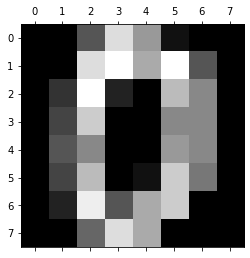

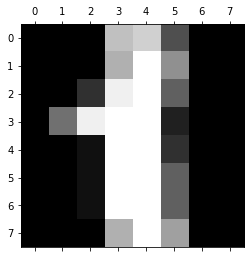

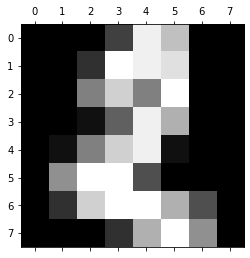

In [9]:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
#so we use data and target to train our model
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)
len(X_train)

1437

In [14]:
len(X_test)

360

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [17]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [18]:
model.score(X_test,y_test)

0.9611111111111111

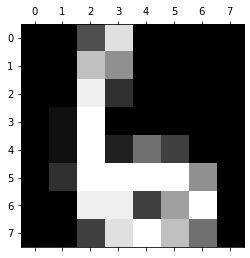

In [20]:
plt.matshow(digits.images[67])

In [23]:
digits.target[67]

6

In [24]:
model.predict([digits.data[67]])

array([6])

In [25]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [ ]:
#How do I know that where my model is not doing well because all the sample which I have tried give me correct value
#One of the way to check it is confusing_matrix

In [29]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 39,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 44,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37]])

Text(69.0, 0.5, 'Truth')

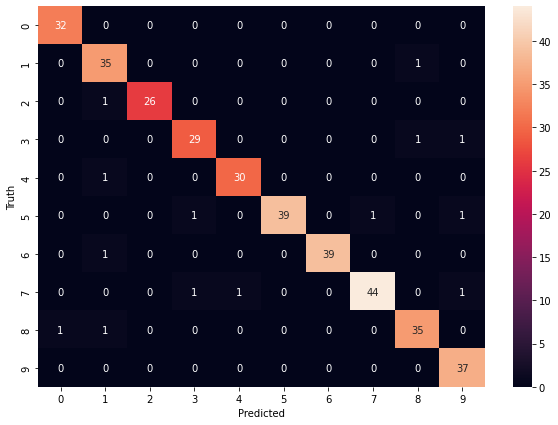

In [30]:
#we should better visualise this matrix using seaborn library
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#This 1st column show 32 time truth value is 0 and our predicted value is also 0 and 1 time the truth value is 8 and our model predict it to be 0 .
#Similarly we can check for second column also